Рівняння має вигляд: y' = (1 - y) * x^2 + F(x) . Покласти h = 0.1, початкові умови x(0) визначити,
використовуючи точне значення розв’язку.
Нехай розв’язок відомий та визначається згідно варіантів:

In [226]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
def f(x):
    return x * np.sin(x)

In [228]:
def f_s(x, y):
    # y'(x) = sin(x) + x cos(x)
    # sin(x) + x cos(x) = (1 - x * sin(x)) * x**2 + F(x)
    # F(x) = sin(x) + x * cos(x) - (1 - x * sin(x)) * x**2
    Fx = np.sin(x) + x * np.cos(x) - (1 - x * np.sin(x)) * x**2
    return (1 - y)*x**2 + Fx

In [229]:
n = 45
h = 0.1
x0 = 0
y0 = f(x0)
x0, y0


(0, np.float64(0.0))

In [230]:
def runge_kutta_4(x0, y0, h, n, f_s):
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    for i in range(n-1):
        x_i = x[i]
        y_i = y[i]

        k1 = h * f_s(x_i, y_i)
        k2 = h * f_s(x_i + h/2, y_i + 1/2*k1)
        k3 = h * f_s(x_i + h/2, y_i + 1/2*k2)
        k4 = h * f_s(x_i + h, y_i + k3)

        x[i+1] = x_i + h
        y[i+1] = y_i + (k1 + 2*k2 + 2*k3 + k4)/6
    return x, y

In [231]:
def adams_bashforth_4(x_init, y_init, h, n, f_s):
    x = x_init.copy()
    y = np.zeros_like(y_init)
    y[:4] = y_init[:4]
    for i in range(3, n-1):
        f_n   = f_s(x[i],   y[i])
        f_n1  = f_s(x[i-1], y[i-1])
        f_n2  = f_s(x[i-2], y[i-2])
        f_n3  = f_s(x[i-3], y[i-3])

        y[i+1] = y[i] + h*(55*f_n - 59*f_n1 + 37*f_n2 - 9*f_n3)/24
    return x, y


In [ ]:
x_rk, y_rk = runge_kutta_4(x0, y0, h, n, f_s)
x_ab, y_ab = adams_bashforth_4(x_rk, y_rk, h, n, f_s)
y_true = f(x_rk)
print("x &", " & ".join(map(str, np.round(x_rk, 5))), r"\\")
print("y true &", " & ".join(map(str, np.round(y_true, 5))), r"\\")
print("y runge &", " & ".join(map(str, np.round(y_rk, 5))), r"\\")
print("y adam &", " & ".join(map(str, np.round(y_ab, 5))), r"\\")


x & 0.0 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 1.0 & 1.1 & 1.2 & 1.3 & 1.4 & 1.5 & 1.6 & 1.7 & 1.8 & 1.9 & 2.0 & 2.1 & 2.2 & 2.3 & 2.4 & 2.5 & 2.6 & 2.7 & 2.8 & 2.9 & 3.0 & 3.1 & 3.2 & 3.3 & 3.4 & 3.5 & 3.6 & 3.7 & 3.8 & 3.9 & 4.0 & 4.1 & 4.2 & 4.3 & 4.4 \\
y true & 0.0 & 0.00998 & 0.03973 & 0.08866 & 0.15577 & 0.23971 & 0.33879 & 0.45095 & 0.57388 & 0.70499 & 0.84147 & 0.98033 & 1.11845 & 1.25263 & 1.37963 & 1.49624 & 1.59932 & 1.68583 & 1.75293 & 1.79797 & 1.81859 & 1.81274 & 1.77869 & 1.71512 & 1.62111 & 1.49618 & 1.3403 & 1.15393 & 0.93797 & 0.69382 & 0.42336 & 0.1289 & -0.1868 & -0.52056 & -0.86884 & -1.22774 & -1.59307 & -1.96039 & -2.32506 & -2.68229 & -3.02721 & -3.35494 & -3.66062 & -3.93951 & -4.18705 \\
y runge & 0.0 & 0.00998 & 0.03973 & 0.08866 & 0.15577 & 0.23971 & 0.33879 & 0.45095 & 0.57388 & 0.70499 & 0.84147 & 0.98033 & 1.11845 & 1.25262 & 1.37963 & 1.49624 & 1.59931 & 1.68582 & 1.75291 & 1.79794 & 1.81856 & 1.81269 & 1.77862 & 1.71503 & 1.62099 & 1.4

In [233]:
err_rk = np.abs(y_true - y_rk)
err_ab = np.abs(y_true - y_ab)

In [234]:
print("Максимальна похибка РК4:", np.max(err_rk))
print("Максимальна похибка АБ4:", np.max(err_ab))

Максимальна похибка РК4: 0.003127750455649725
Максимальна похибка АБ4: 0.0015208640107156057


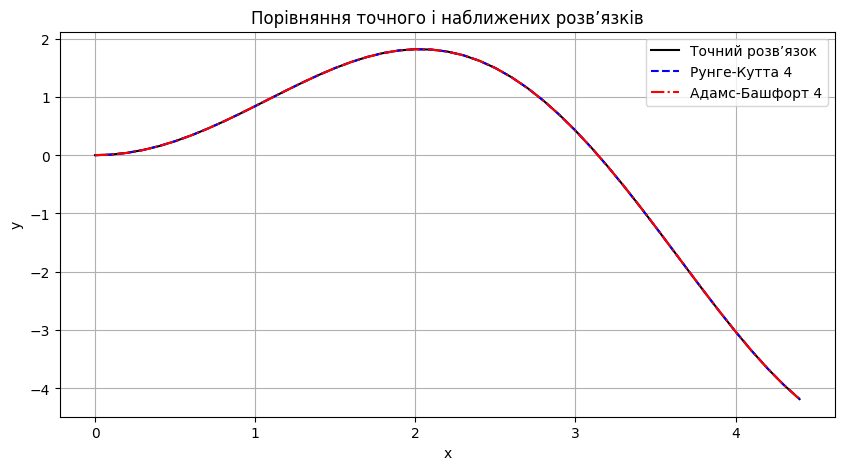

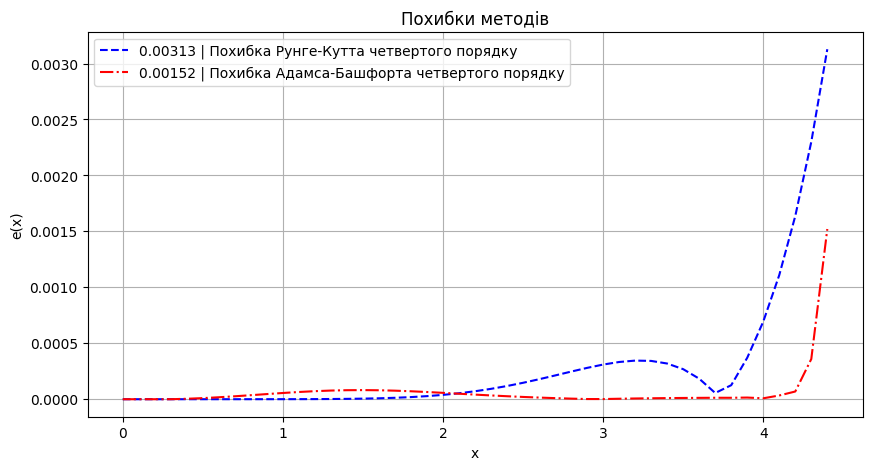

In [235]:
plt.figure(figsize=(10,5))
plt.plot(x_rk, y_true, 'k-', label='Точний розв’язок')
plt.plot(x_rk, y_rk, 'b--', label='Рунге-Кутта 4')
plt.plot(x_ab, y_ab, 'r-.', label='Адамс-Башфорт 4')
plt.legend()
plt.title("Порівняння точного і наближених розв’язків")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x_rk, err_rk, 'b--', label=f'{np.round(np.max(err_rk), 5)} | Похибка Рунге-Кутта четвертого порядку')
plt.plot(x_ab, err_ab, 'r-.', label=f'{np.round(np.max(err_ab), 5)} | Похибка Адамса-Башфорта четвертого порядку')
plt.legend()
plt.title("Похибки методів")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("e(x)")
plt.show()